In [1]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Importing the Dataset
data = pd.read_csv("./Wholesale customers data.csv")
data.drop(labels=(['Channel','Region']),axis=1,inplace=True)
print('Wholesale customers has {} samples with {} features each'.format(*data.shape))

Wholesale customers has 440 samples with 6 features each


In [4]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [5]:
# Display a brief description of the overall dataset
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
# Display complete information of the data frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


In [7]:
# Select three indices of your choice you wish to sample from the dataset
indices = [22,154,398]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns=data.keys()).reset_index(drop=True)
print("Chosen samples of wholesale customers dataset:")
display(samples)


Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,31276,1917,4469,9408,2381,4334
1,622,55,137,75,7,8
2,11442,1032,582,5390,74,247


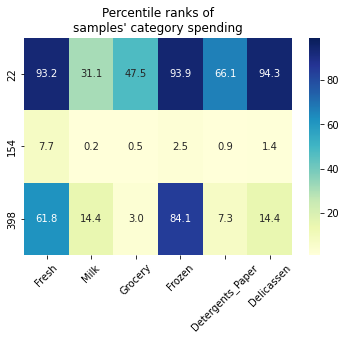

In [8]:
# look at percentile ranks
#pcts = 100. * data.rank(axis=0, pct=True).iloc[indices].round(decimals=3)
pcts = 100. * data.rank(axis=0, pct=True).iloc[indices].round(decimals=3)
# visualize percentiles with heatmap

sns.heatmap(pcts, annot=True, vmin=1, vmax=99, fmt='.1f', cmap='YlGnBu')
plt.title('Percentile ranks of\nsamples\' category spending')
plt.xticks(rotation=45, ha='center');


In [9]:
# Import libraries for Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Remove column Milk
new_data = data.drop('Milk',axis=1)

In [10]:
# Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Milk'], test_size=0.25, random_state=1)

# Create a decision tree regressor and fit it to the training set
regressor =  DecisionTreeRegressor(random_state=1)
regressor.fit(X_train, y_train)

# Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print(score)


0.5158499438066617


#### To predict Milk using the other features in the dataset and the score ended up being 0.515. At this initial stage we might say that this feature is somewhat difficult to predict because the score is around the halfway point of possible scores. Remember that R^2 goes from 0 to 1. This might indicate that it could be an important feature to consider.

### Visualize Feature Distributions

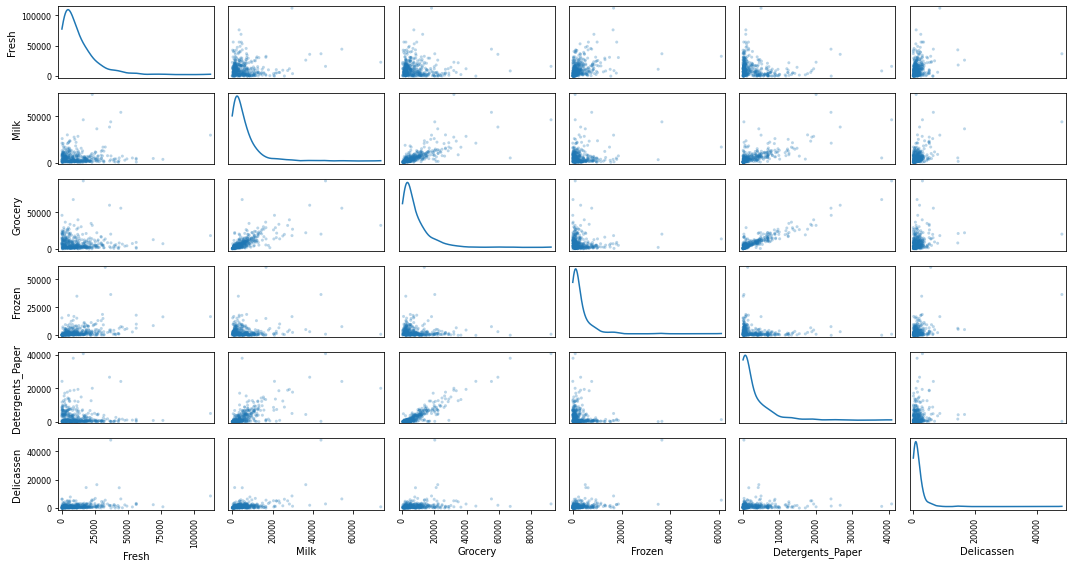

In [11]:
pd.plotting.scatter_matrix(data, alpha=0.3,figsize=(15,8),diagonal='kde' )
plt.tight_layout() # To avoid overlapping of plots

## Data Preprocessing
To preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results we obtain from your analysis are significant and meaningful.

## Implementation: Feature Scaling
#### Feature scaling is a method used to standardize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

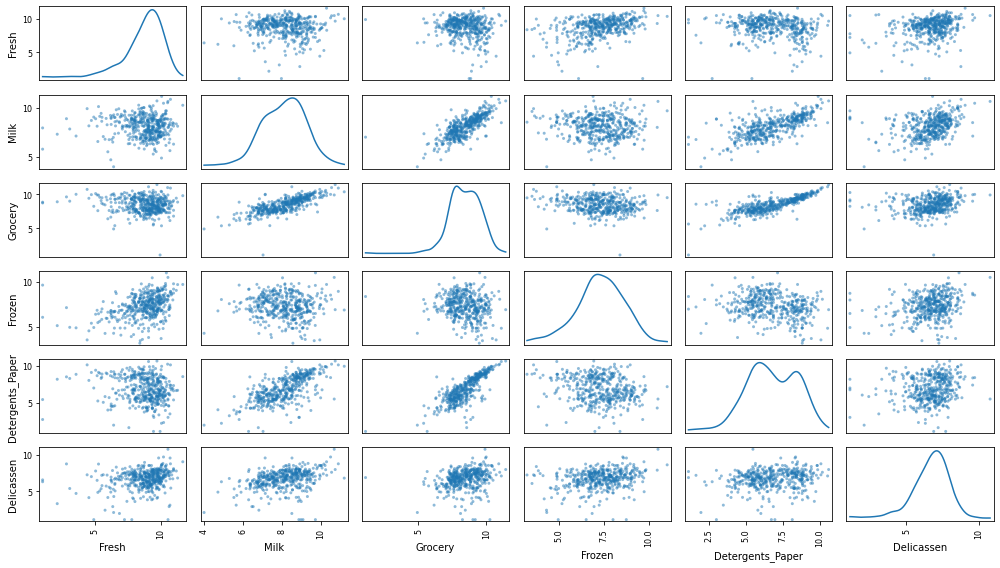

In [12]:
# Scale the data using the natural logarithm
log_data = np.log(data.copy())

# Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha=0.5, figsize=(14,8),diagonal='kde')
plt.tight_layout()

## Observation
#### After applying a natural logarithm scaling to the data, the distribution of each feature appears much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

In [13]:
# Let's compare the original sample data to the log-transformed sample data
print("Original chosen samples of wholesale customers dataset:")
display(samples)

# Display the log-transformed sample data
print("Log-transformed samples of wholesale customers dataset:")
display(log_samples)

Original chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,31276,1917,4469,9408,2381,4334
1,622,55,137,75,7,8
2,11442,1032,582,5390,74,247


Log-transformed samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,10.350606,7.558517,8.404920,9.149316,7.775276,8.374246
1,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
2,9.345046,6.939254,6.366470,8.592301,4.304065,5.509388


## Implementation: Outlier Detection
#### Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points.

In [14]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():

    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data, 25)

    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data, 75)

    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
# Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
    # Select the indices for data points you wish to remove
outliers  = [66, 75, 338, 142, 154, 289]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
338,1.098612,5.808142,8.856661,9.655090,2.708050,6.309918


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
122,9.410174,5.303305,5.501258,7.596392,3.218876,6.756932
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101
177,9.453992,8.899731,8.419139,7.468513,2.995732,7.875119
204,7.578657,6.792344,8.561401,7.232010,1.609438,7.191429
237,9.835851,8.252707,6.385194,8.441176,3.332205,7.102499
289,10.663966,5.655992,6.154858,7.235619,3.465736,3.091042
338,1.098612,5.808142,8.856661,9.655090,2.708050,6.309918


Data points considered outliers for the feature 'Delicassen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372
233,6.871091,8.513988,8.106515,6.842683,6.013715,1.945910


#### There were a handful of specific rows containing outliers in multiple features based on our definition of an outlier. I chose to remove these rows because having a row show up as multiple outliers can add to our confidence that it is truly an outlier.

## Feature Transformation
In this section we will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

## Implementation: PCA
Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can go ahead and apply PCA to the good_data to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the explained variance ratio of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In [15]:
from sklearn.decomposition import PCA

# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

In [16]:
print(pca.components_)

[[ 0.21392264 -0.39475187 -0.44010253  0.20691301 -0.74192568 -0.10700991]
 [-0.64381547 -0.18576705 -0.11241997 -0.50991866 -0.08727179 -0.52030817]
 [-0.62720898  0.06414633 -0.03758881  0.08806961 -0.2720558   0.72063209]
 [-0.38236666  0.01374015  0.00569147  0.82912144  0.16410724 -0.37309651]
 [ 0.01137444  0.74284767  0.30735768 -0.01142146 -0.54234253 -0.24354333]
 [-0.00374186 -0.50352295  0.83531878  0.04290564 -0.2164462  -0.00182239]]


In [17]:
print(pca.explained_variance_)

[4.52563843 2.78067608 1.13683913 1.0169372  0.46737122 0.19773848]


In [18]:
pca_samples

array([[ 0.10386282, -2.80192323,  0.0745543 ,  0.44428191, -1.37505936,
         0.10828145],
       [ 6.20014668,  7.01961701, -0.94091359, -0.74060463, -0.37897464,
         0.06591127],
       [ 3.79702755,  0.26725311, -0.42705142,  0.84604866,  0.11361609,
        -0.5462458 ]])